In [1]:
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# **UNIRSE A LOS DATAFRAMES**

In [4]:
train['train']  = 1
test['train']  = 0
df_train = pd.concat([train, test], axis=0,sort=False)  # Se concatenan los dataframe

In [5]:
#Obtenemos un resumen de los datos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [7]:
df_train.shape

(2919, 82)

In [8]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Revisemos nuestra variable para predecir
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

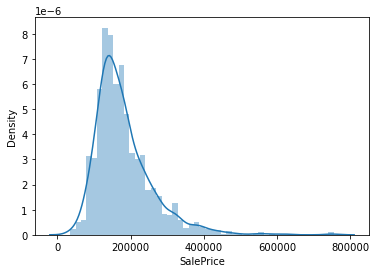

In [10]:
#histograma
sns.distplot(df_train['SalePrice']);


* Distribución normal.
* Sesgo positivo.
* Mostrar  leptokurtic.

In [11]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [12]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


In [13]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


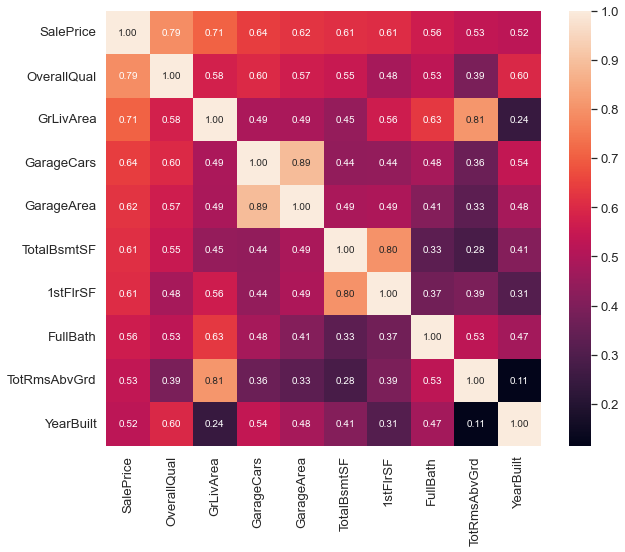

In [14]:
#Matriz de correlación de precio de venta más alto
k = 10 #número de variables para el mapa de calor
cols = df_train.corr().nlargest(k, 'SalePrice').index
cm = df_train[cols].corr().values
sns.set(font_scale=1.2) # Tamaño de las letras
plt.subplots(figsize=(10, 8)) # Tamaño del mapa de calor
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

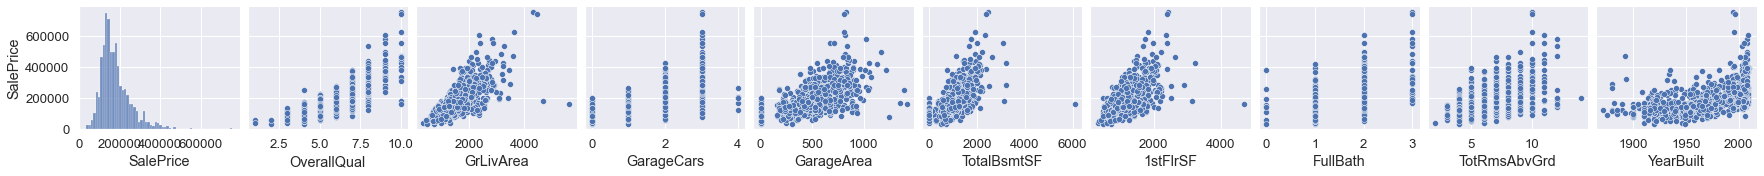

In [15]:
#Los 10 mapas de dispersión de mayor correlación
cols
sns.pairplot(df_train[cols],
             y_vars=['SalePrice'],
             x_vars=cols)

# **MISSING DATA**

In [16]:
# llenemos con 0 nuestra variable objetivo
df_train['SalePrice'].fillna(0, inplace = True)

In [17]:
#datos perdidos
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.drop(missing_data[missing_data['Total'] == 0].index,inplace = True)
missing_data

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageQual,159,0.054471
GarageCond,159,0.054471
GarageFinish,159,0.054471
GarageYrBlt,159,0.054471


Text(0.5, 1.0, 'Porcentaje de datos faltantes por característica')

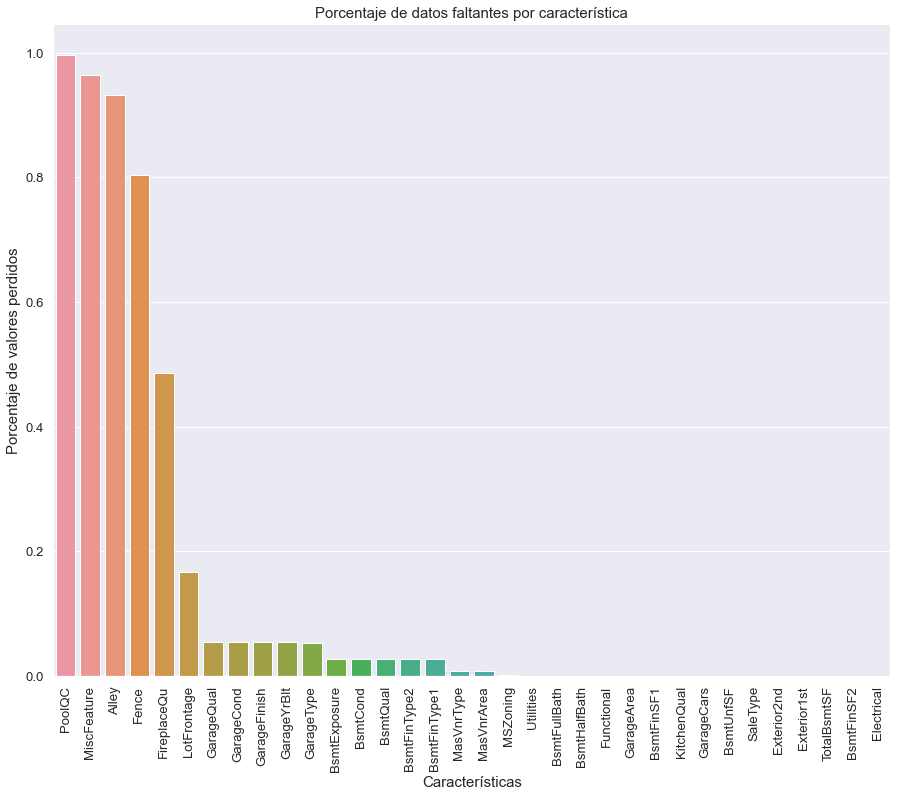

In [18]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Características', fontsize=15)
plt.ylabel('Porcentaje de valores perdidos', fontsize=15)
plt.title('Porcentaje de datos faltantes por característica', fontsize=15)

In [19]:
#Para manejar los datos faltantes, eliminaremos todas las variables con datos faltantes
df_train =df_train.drop((missing_data[missing_data['Total'] > 5]).index, axis=1)
print(df_train.isnull().sum().max())

4


In [20]:
#Faltan datos numéricos
md = missing_data[missing_data['Total'] <= 5].index
num = df_train[md].dtypes[df_train[md].dtypes != 'object']
for col in num.index:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

In [21]:
#Faltan datos categóricos
cat = df_train[md].dtypes[df_train[md].dtypes == 'object']
for col in cat.index:
    df_train[col].fillna(df_train[col].mode()[0], inplace=True)

In [22]:
#Comprobando si quedan valores faltantes
df_train.isnull().sum().max()

0

# **OUTLIERS**

In [23]:
#Estandarización de datos
#Necesitamos establecer un umbral que defina una observación como un valor atípico. Para hacerlo, estandarizaremos los datos.
#En este contexto, la estandarización de datos significa convertir valores de datos para que tengan una media de 0 y una desviación estándar de 1.

saleprice_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('rango exterior (bajo) de la distribución:')
print(low_range)
print('\rango nouter (alto) de la distribución:')
print(high_range)

rango exterior (bajo) de la distribución:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]
ango nouter (alto) de la distribución:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


Cómo se ve 'SalePrice' con sus nuevos valores:

Los valores de rango bajo son similares y no muy alejados de 0.
Los valores de rango alto están lejos de 0 y los valores de 7.algo están realmente fuera de rango.
Por ahora, no consideraremos ninguno de estos valores como un valor atípico, pero debemos tener cuidado con esos dos valores de 7.algo.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


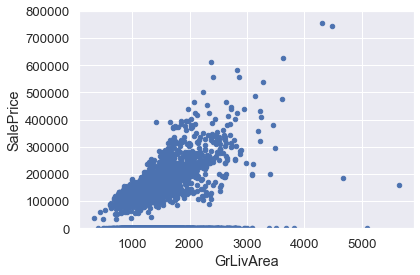

In [24]:
#análisis bivariado saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Podemos ver en la parte inferior derecha dos con GrLivArea extremadamente grandes que tienen un precio bajo. Estos valores son enormes valores atípicos. Por lo tanto, podemos eliminarlos con seguridad.

In [25]:
train.shape

(1460, 82)

In [26]:
#datos originales
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
#datos completos
df_train = df_train.reset_index(drop=True)
drop = df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000) & (df_train['train']==1)].index
df_train = df_train.drop(drop)


 mu = 90435.45 and sigma = 106492.54



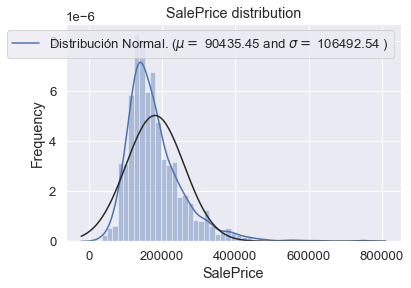

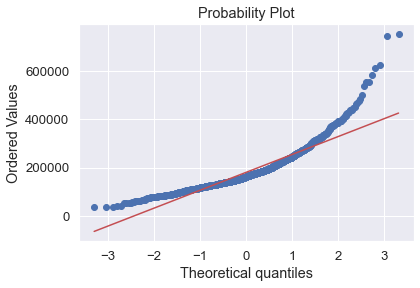

In [27]:
sns.distplot(df_train['SalePrice'][df_train['SalePrice']>0] , fit=norm);

# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = norm.fit(df_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Ahora traza la distribución
plt.legend(['Distribución Normal. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'][df_train['SalePrice']>0], plot=plt)
plt.show()

SalePrice no es normal. Muestra 'pico', asimetría positiva y no sigue la línea diagonal.
En caso de asimetría positiva, las transformaciones logarítmicas suelen funcionar bien.


 mu = 12.02 and sigma = 0.40



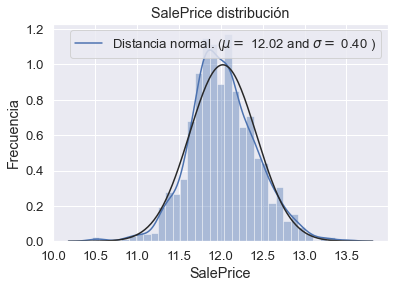

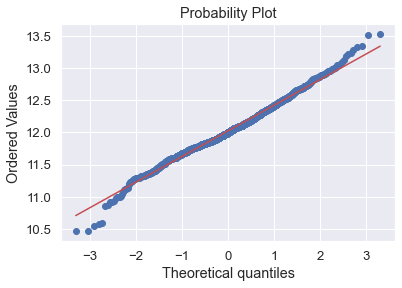

In [28]:
#Usamos la función numpy log1p que aplica log(1+x) a todos los elementos de la columna SalePrice
df_train['SalePrice'][df_train['SalePrice']>0] = np.log(df_train['SalePrice'][df_train['SalePrice']>0])

#Consulta la nueva distribución
sns.distplot(df_train['SalePrice'][df_train['SalePrice']>0] , fit=norm);

# Obtener los parámetros ajustados utilizados por la función
(mu, sigma) = norm.fit(df_train['SalePrice'][df_train['SalePrice']>0])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Ahora traza la distribución
plt.legend(['Distancia normal. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('SalePrice distribución')

#Obtenga también el gráfico QQ
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'][df_train['SalePrice']>0], plot=plt)
plt.show()

In [29]:
#convertir variable categórica en ficticia
df_train = pd.get_dummies(df_train)
print(df_train.shape)

(2917, 222)


In [30]:
!pip install xgboost

# **MODELADO**

In [31]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import sklearn.metrics as metrics
import math

In [32]:
#Datos objetivo, de entrenamiento y de prueba
df_final = df_train.drop(['Id',],axis=1)

target = df_final['SalePrice'][df_final['train'] == 1]

train_final = df_final[df_final['train'] == 1]
train_final = train_final.drop(['train','SalePrice'],axis=1)


test_final = df_final[df_final['train'] == 0]
test_final = test_final.drop(['train','SalePrice'],axis=1)

In [33]:
train_final

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0.0,953.0,953.0,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,790.0,163.0,589.0,1542.0,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,275.0,0.0,877.0,1152.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,49.0,1029.0,0.0,1078.0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
x_train,x_test,y_train,y_test = train_test_split(train_final,target,test_size=0.20,random_state=0)  #random_state,  fija una semilla para el generador de números aleatorio 
#para mantener la reproducibilidad de los resultados, también se asigna un estado aleatorio.

In [35]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)

In [36]:
y_test

411     11.884489
211     12.133502
342     11.379394
303     11.917724
159     12.676076
          ...    
92      12.004568
811     11.881035
295     11.867097
1001    11.362103
40      11.982929
Name: SalePrice, Length: 292, dtype: float64

Calculamos el error al cuadrado, en lugar del error simple, para que el error siempre sea positivo. De esta forma sabemos que el error perfecto es 0. Si no elevásemos el error al cuadrado, unas veces el error sería positivo y otras negativo.

In [37]:
#Ajuste de todos los marcos de datos
xgb.fit(x_train, y_train)
predict = xgb.predict(x_test)
# El error perfecto es 0.
print('Prueba de error cuadrático medio = ' + str(math.sqrt(metrics.mean_squared_error(y_test, predict))))

[17:18:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Prueba de error cuadrático medio = 0.10547543851356637


In [41]:
#Ajuste del marco de datos del tren
xgb.fit(train_final, target) # fit permite hacer el entrenamiento
predict_final = np.expm1(xgb.predict(test_final)) # Preidct Genera la predicción

[17:24:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
#Lista de precios predecida
predict_final

array([122844.914, 164069.88 , 183674.5  , ..., 173282.47 , 118661.9  ,
       222536.72 ], dtype=float32)

In [40]:
submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": predict_final
    })
submission.to_csv('submission.csv', index=False)